# What is classification ?

- Import the data you'll be using
- Visualize/Analyze your dataset
- Perform classification on it

### 1.a -  We use the mnist dataset

In [1]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print "input of training set has shape {} and output has shape {}".format(x_train.shape, y_train.shape)
print "input of testing set has shape {} and output has shape {}".format(x_test.shape, y_test.shape)

Using TensorFlow backend.


input of training set has shape (60000, 28, 28) and output has shape (60000,)
input of testing set has shape (10000, 28, 28) and output has shape (10000,)


### 1.b - How does Mnist look like ?

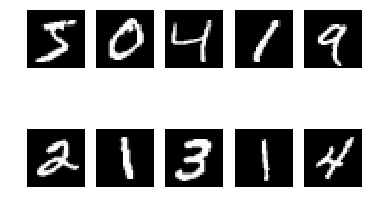

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, axs = plt.subplots(2,5)
axs = [b for a in axs for b in a]
for i in range(2*5):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].axis('off')
plt.show()

### 1.c - Distribution of the Mnist dataset

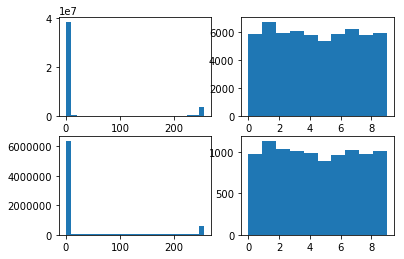

In [3]:
fig, axs = plt.subplots(2,2)
axs[0][0].hist(x_train.reshape([-1]), bins = 25)
axs[0][1].hist(y_train.reshape([-1]), bins = 10)
axs[1][0].hist(x_test.reshape([-1]), bins = 25)
axs[1][1].hist(y_test.reshape([-1]), bins = 10)
plt.show()

### 1.c - Normalize and change the encoding of the data

In [4]:
# Normalize the MNIST data
x_train = x_train/255.
x_test = x_test/255.

# Change the one-hot-encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

---
### 2 - Classify our data

We are going to choose in between 3 classifier to classify our data:

- SVM
- Nearest Neighboor
- Logistic Regression

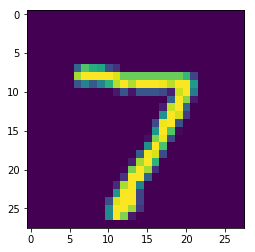

In [5]:
sample = x_test[0]
plt.imshow(sample)

### 2.a - SVM

https://www.youtube.com/watch?v=_PwhiWxHK8o

In [6]:
from sklearn import svm
from skimage.transform import resize

# 24*24 images'll be too big, we downsample them to 8*8
def to_svm_image(img):
    img = resize(img, [8,8])
    return img.reshape([-1])

x_train_svm = map(to_svm_image, x_train)
x_train_svm = np.array(x_train_svm)

# Train the classifier here
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(x_train_svm, y_train.argmax(axis=1))

# Test the classifier
sample = to_svm_image(x_test[0])
sample = sample.reshape([1,-1])
prediction = clf.predict(sample)

print "With SVM, our sample is closest to class {}".format(prediction[0])

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


With SVM, our sample is closest to class 7


###  2.b - Nearest neighboor

Browse throught the entire dataset which is the closest "neighboor" to our current example.

In [7]:
sample = x_test[0]

def distance(tensor1, tensor2, norm='l1'):
    if norm == "l1":
        dist = np.abs(tensor1 - tensor2)
    if norm == "l2":
        dist = tensor1 ** 2 - tensor2 ** 2
    dist = np.sum(dist)
    return dist

def predict(sample, norm='l1'):
    min_dist = 100000000000
    min_idx = -1
    for idx, im in enumerate(x_train):
        if distance(sample, im) < min_dist:
            min_dist = distance(sample, im, norm)
            min_idx = idx
    y_pred = y_train[min_idx]     
    return y_pred

y = predict(sample, 'l1')
print "With NN, our sample is closest to class {}".format(y.argmax())

With NN, our sample is closest to class 7


### 2.c - Softmax regression 

$ y = \sigma(W^T \cdot X + b) $

In [8]:
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# Train the classifier here
clf_sgd = SGDClassifier()
clf_sgd.fit(x_train_svm, y_train.argmax(axis=1))

# Test the classifier
sample = to_svm_image(x_test[0])
sample = sample.reshape([1,-1])
prediction = clf.predict(sample)

print "With Softmax regression, our sample is closest to class {}".format(prediction[0])

With Softmax regression, our sample is closest to class 7
